# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Create a path to where the data is stored
path = r'/Users/roxanamiu/Documents/Climate Change project/Data'

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# Import scaled dataset
scaled = pd.read_pickle(os.path.join(path, 'DataSet_scaled.pkl'))
scaled


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.023730,

In [5]:
scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1

In [6]:
# Import the answers dataset (0 = unpleasant day, 1 = pleasant day)

answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#The answers don’t include three of the weather stations, as there isn’t enough pertinent data to create a supervised answer set. In the next step, we will identify them.

# Data Wrangling

In [8]:
# Extract the unique weather stations names from the answers df by removing the suffix "_pleasant_weather"

unique_stations = answers.columns[1:].str.replace('_pleasant_weather', '')
unique_stations

Index(['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW',
       'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO',
       'SONNBLICK', 'STOCKHOLM', 'VALENTIA'],
      dtype='object')

In [9]:
# Convert the list into a set

unique_stations_set = set(unique_stations.unique())
unique_stations_set

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [10]:
# Extract the unique stations names from the weather data df by removing the suffixes
# Define the suffixes to remove

suffixes = ["_cloud_cover", "_wind_speed", "_humidity", "_pressure", "_global_radiation", "_precipitation", "_snow_depth", "_sunshine", "_temp_mean", "_temp_min", "_temp_max"]

In [11]:
# Remove the suffixes and extract the names

columns_to_process = scaled.columns[2:]
unique_stations = columns_to_process.copy()

for suffix in suffixes:
    unique_stations = unique_stations.str.replace(suffix, '', regex = False)

long_list_set = set(unique_stations.unique())

# Print the result

long_list_set

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [12]:
# Find the stations that are missing from the first list but present in the second list

missing_stations = long_list_set - unique_stations_set

# Print the result

print(f"Weather stations missing from the answers dataset: {missing_stations}")

Weather stations missing from the answers dataset: {'TOURS', 'ROMA', 'GDANSK'}


In [13]:
#the missing weather stations from the answers dataset are: Gdansk, Rome and Tours. We need to drop columns in the weather dataset pertaining to these stations.

In [14]:
# Drop the columns related to Tours, Gdansk and Rome from the weather dataset

weather = scaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [15]:
weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.023730,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-

# K-Nearest Neighbors (KNN) model

In [16]:
# Create 'X' and 'y' matrices by dropping the unneeded columns

X = weather.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [17]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [18]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 46)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [20]:
# Run the model with neighbors equal to 1 to 9 to test the accuracy

k_range = np.arange(1,10)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    classifier = MultiOutputClassifier(knn, n_jobs = -1) 
    ## Fit the model on the training data
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

<function matplotlib.pyplot.show(close=None, block=None)>

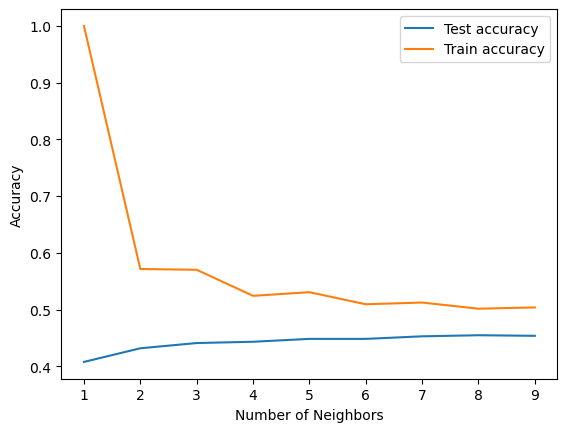

In [21]:
# Plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

PARAMETERS: X = scaled weather data y = answers data random_state = 46 k_range = 1-9

In [22]:
#When k=1, the training accuracy is very high, almost perfect. 
#This means the model is overfitting, or memorizing, the training data. 
#As you increase the number of neighbors, the training accuracy drops because the model becomes less sensitive to the training data.
#As k increases from 1 to 9, the test accuracy improves and stabilizes, suggesting the model is better at generalizing. However, 
#there’s a limit where further increasing k doesn’t significantly enhance the test accuracy.
#lower values of k (e.g., k = 1) result in a high-variance model that is sensitive to the training data, leading to overfitting. Higher values of k introduce
#more bias, making the model more stable and less sensitive to noise in the training data, thus improving generalization to the test data.

# Plotting Multilabel Confusion Matrix

In [23]:
locations = list({x.split("_")[0] for x in weather.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

ValueError: Found input variables with inconsistent numbers of samples: [5738, 17212]

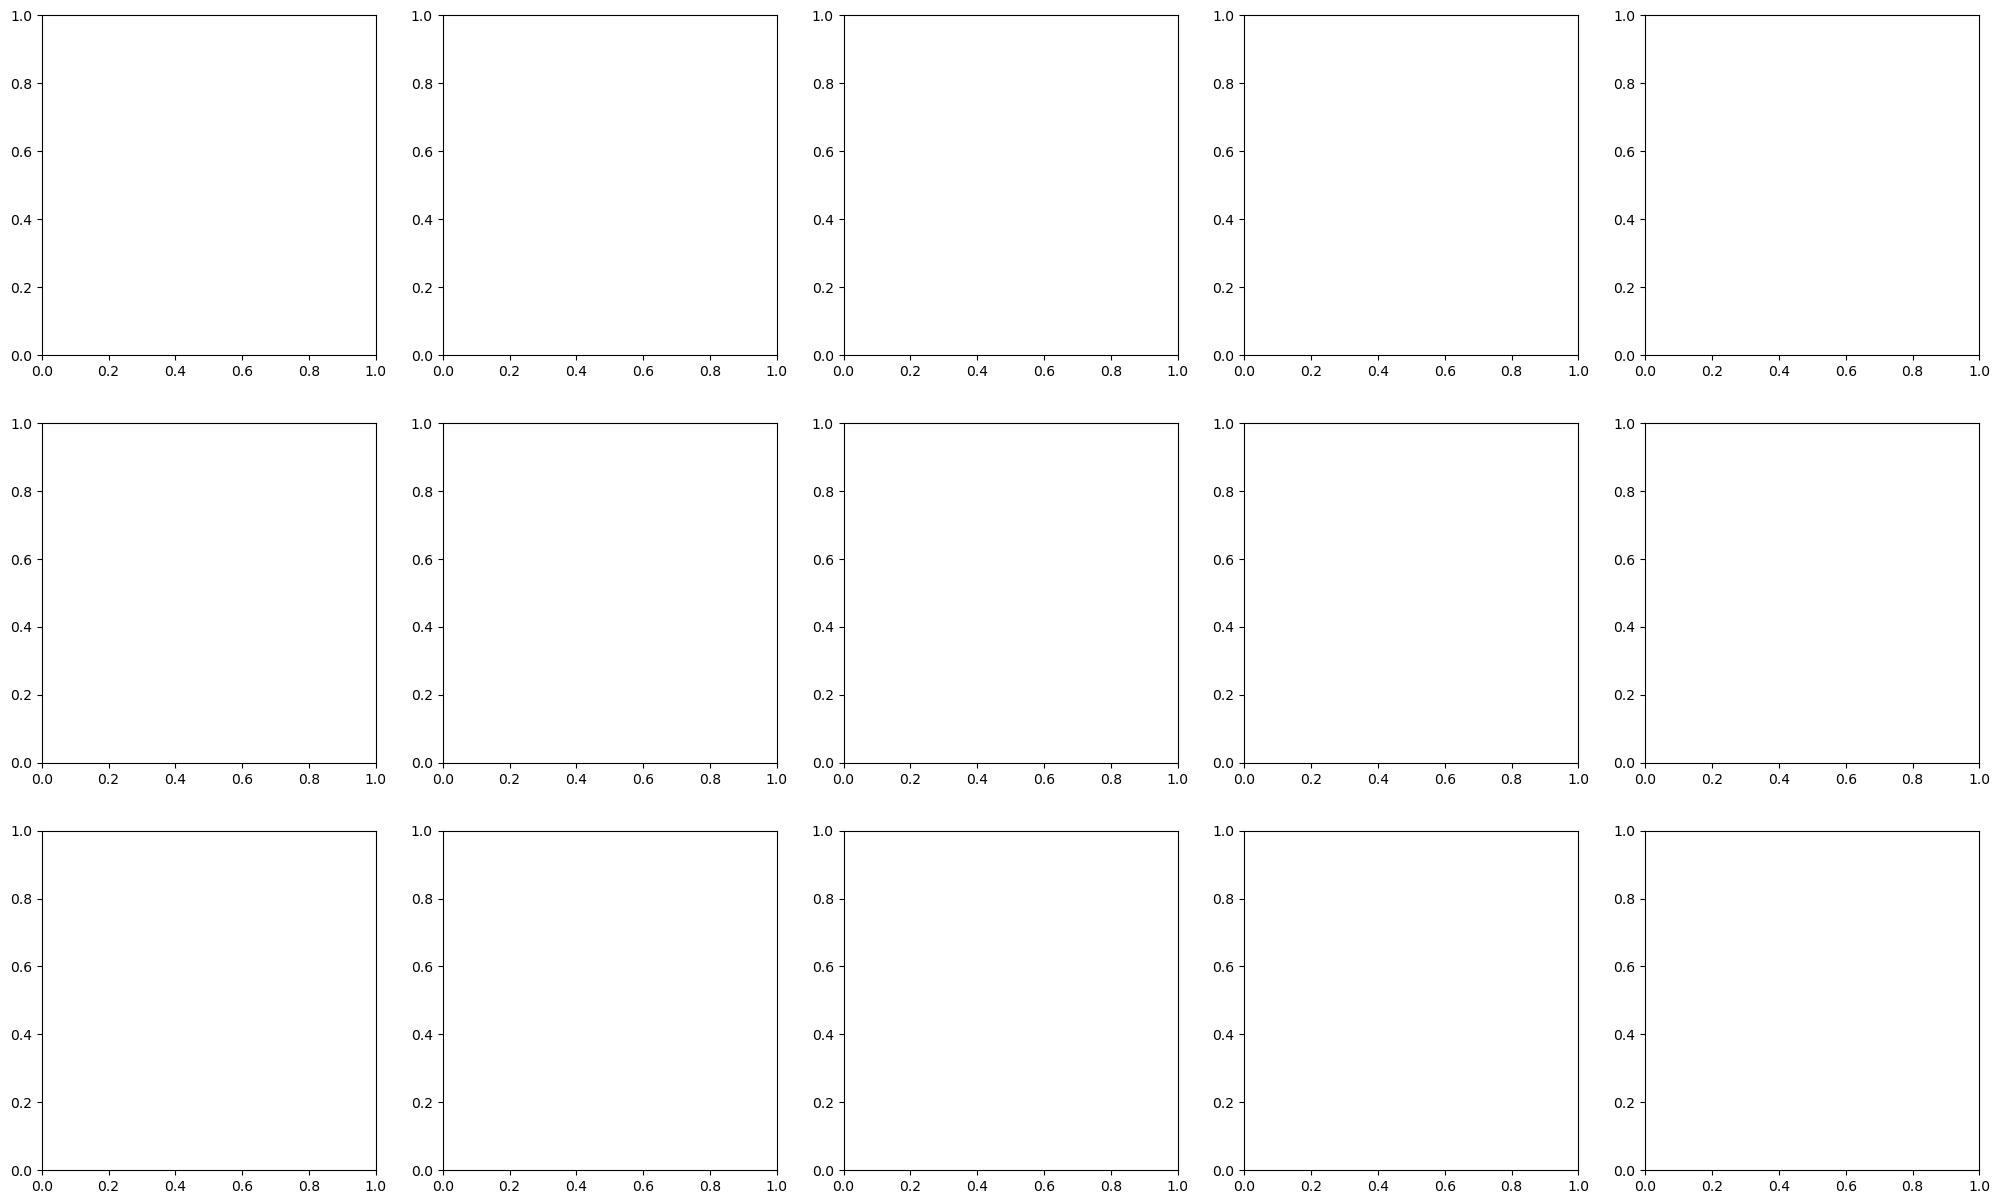

In [31]:
key = "_pleasant_weather"
stations = []
accuracy_rates = []  # List to store accuracy rates for each station
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        
        # Check if confusion matrix has the expected shape
        if cm.shape == (2, 2):
            # Calculate accuracy for 2x2 confusion matrix
            accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm) # True positives + True negatives / Total samples
        else:
            # Handle the case where only one class is present in y_true or y_pred
            accuracy = cm[0, 0] / np.sum(cm)
        
        accuracy_rates.append((name, accuracy))
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(np.round(100*cm/np.sum(cm), decimals=1), annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
# Print the accuracy rates for each station
for station, accuracy in accuracy_rates:
    print(f"Weather Station: {station}, Accuracy: {accuracy:.2%}")

In [25]:
# Calculate the average accuracy across all stations

average_accuracy = sum(accuracy for station, accuracy in accuracy_rates) / len(accuracy_rates)
print(f"Average Accuracy Across All Stations: {average_accuracy:.2%}")

Average Accuracy Across All Stations: 90.98%


In [26]:
# Check for accuracy

y_pred = knn.predict(X_train)
print("Training Accuracy:", accuracy_score(y_pred, y_train))

y_pred_test = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred_test, y_test))

Training Accuracy: 0.50371833604462
Test Accuracy: 0.45364238410596025


In [27]:
#The accuracy is quite low: Training accuracy hovers just above 50%, while test accuracy is around 45%. 
#This indicates that the model is having difficulty grasping the underlying patterns within the dataset.

In [28]:
#The narrow difference between training and test accuracy (around 5%) suggests that our model is avoiding overfitting.

In [29]:
#The low accuracy on both the training and test sets indicates that this model may be underfitting. This suggests that the KNN 
#model is too simplistic and fails to capture the complexities of the data.

In [30]:
#KNN is a non-parametric model, meaning it doesn't make assumptions about the data's distribution.
#Its performance heavily depends on choosing the right number of neighbors (k). 
#To boost performance, we might need to try different k values or tweak other hyperparameters.